In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_disease_dataset.csv", sep = ";")

In [3]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: >

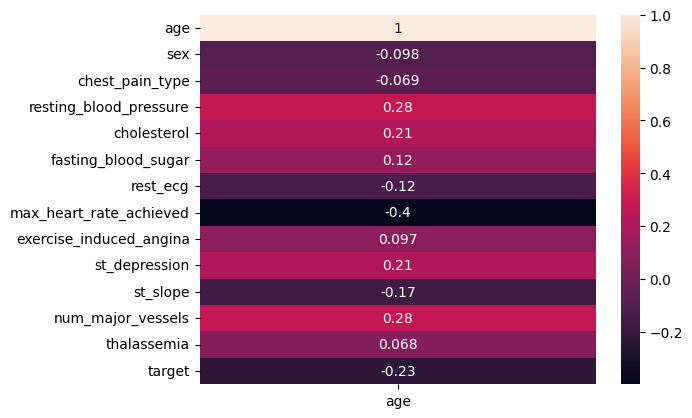

In [4]:
sns.heatmap(df.corr().iloc[:, [0]], annot = True)

1. Inputs --> 14, Outputs --> 1, Parameters --> batch_size, epoch_size, learning_rate

2. If the Accuracy Score keeps increasing rapidly, we should keep training our model

In [5]:
X = df.drop("target", axis = 1)
y = df["target"]

y_list = []

for yy in y:
    y_list.append([yy])

y = np.array(y_list).astype(float)

In [6]:
from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

FIRST METHOD: WRITING FROM THE SCRATCH

In [7]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (2*(y_true - y_pred))

class ArtificialNeuralNetwork:
    def __init__(self, x, y):
        self.IN      = x
        self.W1   = np.random.rand(self.IN.shape[1],16) 
        self.W2   = np.random.rand(16,1)                 
        self.y          = y
        self.OUT     = np.zeros(self.y.shape)
        self.learning_rate = 0.3

    def feed_forward(self):
        self.HIDDEN_LAYER_1 = sigmoid(np.dot(self.IN, self.W1))
        self.output = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))

    def back_propagate(self):
        # application of the chain rule to find derivative of the loss function with respect to W2 and W1
        print(self.HIDDEN_LAYER_1.T)
        d_W2 = np.dot(self.HIDDEN_LAYER_1.T, (mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output)))
        print(d_W2)
        d_W1 = np.dot(self.IN.T,  (np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W2.T) * sigmoid_derivative(self.HIDDEN_LAYER_1)))

        # update the weights with the derivative (slope) of the loss function
        self.W1 += self.learning_rate*d_W1
        self.W2 += self.learning_rate*d_W2

    def train(self, epochs,learning_rate):
        self.learning_rate=learning_rate
        for i in range(epochs):
            self.feed_forward()
            self.back_propagate()
        print("Successfully Trained the Model")
        print("Weights 1:", self.W1)
        print("Weights 2:", self.W2)
    
    def print_output(self):
        print(self.output)

In [8]:
epochs = 2
learning_rate = 0.5
ann = ArtificialNeuralNetwork(X,y)
ann.train(epochs, learning_rate)

[[0.35544476 0.73550297 0.34190994 ... 0.95667448 0.80122142 0.33681085]
 [0.45559294 0.83178266 0.57633883 ... 0.84169877 0.20366724 0.34979068]
 [0.30876965 0.55375827 0.42505262 ... 0.56532563 0.17701965 0.38542124]
 ...
 [0.75682006 0.64225398 0.19744677 ... 0.81686691 0.16969069 0.33267575]
 [0.55103146 0.82403107 0.36042612 ... 0.98457238 0.48243395 0.54295149]
 [0.71924887 0.552588   0.23399501 ... 0.990588   0.80353787 0.21647809]]
[[-3.90488998]
 [-2.49329948]
 [-2.48499901]
 [-3.9742225 ]
 [-3.27740796]
 [-2.59836635]
 [-2.61525245]
 [-3.08220634]
 [-3.71481659]
 [-2.54229863]
 [-3.48029128]
 [-3.07898004]
 [-4.10024134]
 [-2.13250715]
 [-3.84137761]
 [-4.06215823]]
[[0.35360747 0.7461546  0.33433431 ... 0.93159124 0.71391442 0.31730996]
 [0.45150231 0.8363295  0.57029123 ... 0.76287478 0.14173884 0.32754929]
 [0.30374465 0.57849092 0.40589883 ... 0.24625637 0.06069279 0.31725712]
 ...
 [0.75314437 0.6719885  0.17542271 ... 0.45216687 0.04923561 0.24518044]
 [0.55372977 0.831

In [9]:
ann.print_output()

[[5.09885631e-06]
 [3.59091022e-06]
 [1.11053358e-03]
 [1.32408482e-06]
 [1.23473583e-06]
 [1.12073252e-03]
 [1.57751246e-04]
 [4.94969373e-06]
 [1.22675985e-08]
 [5.99621257e-08]
 [1.04526712e-06]
 [7.08410084e-05]
 [1.06510900e-06]
 [5.72133910e-05]
 [9.93397196e-08]
 [4.55060744e-04]
 [9.27950149e-07]
 [2.40601597e-05]
 [3.72289754e-07]
 [1.84586465e-08]
 [8.87953746e-06]
 [1.98570904e-07]
 [8.80934025e-06]
 [5.87243163e-08]
 [2.43225920e-08]
 [1.20585543e-08]
 [2.54028180e-08]
 [3.99685497e-03]
 [4.53698917e-08]
 [1.79253139e-03]
 [3.27291395e-03]
 [1.06899638e-04]
 [7.82284088e-05]
 [1.16223981e-03]
 [7.42510575e-06]
 [2.61607501e-03]
 [1.62165149e-07]
 [1.09669144e-07]
 [9.14642463e-08]
 [1.23291768e-07]
 [2.94056549e-06]
 [4.58042441e-04]
 [8.66275650e-03]
 [2.71797050e-02]
 [1.66216746e-06]
 [1.01400236e-06]
 [7.27348258e-06]
 [3.02238430e-05]
 [6.29710960e-02]
 [1.20698266e-03]
 [3.99050687e-04]
 [8.30242556e-04]
 [8.45165187e-08]
 [1.67604719e-02]
 [7.26782881e-06]
 [1.281195

SECOND METHOD: USING PYTORCH LIBRARY

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

from sklearn.model_selection import train_test_split

In [11]:
scaler = StandardScaler()
X = df.drop('target', axis = 1)
X_normalized = scaler.fit_transform(X)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, stratify = y, test_size=0.2, random_state=100)

In [12]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [13]:
train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

In [14]:
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, shuffle = True)

In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.fc1 = nn.Linear(13, 6)
        self.fc2 = nn.Linear(6, 4)
        self.out = nn.Linear(4, 1)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.sigmoid(self.out(X))
        return X
    
model = NeuralNetwork().to('cpu')

In [16]:
learning_rate = 0.01
n_epochs = 1000
optimizer = optim.SGD(params = model.parameters(), lr = learning_rate)
criterion = nn.BCELoss()

In [17]:
def accuracy(y_predicted, y_test):
    y_predicted_tag = torch.round(torch.sigmoid(y_predicted))
    correct_results = (y_test == y_predicted_tag).sum().float()
    acc = correct_results / y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [18]:
model.train()

for i in range(n_epochs):
    epoch_acc = 0
    epoch_loss = 0
    for X_batch, Y_batch in train_loader:

        optimizer.zero_grad()

        y_predicted = model(X_batch)

        acc = accuracy(y_predicted.flatten(), Y_batch.flatten())
        loss = criterion(y_predicted.flatten(), Y_batch.flatten())

        loss.backward()
        optimizer.step()

        epoch_acc += acc.item()
        epoch_loss += loss.item()

    print(f"Epoch: {i} | Loss: {epoch_loss / len(train_loader):.5f} | Accuracy: {epoch_acc / len(train_loader)}%")

Epoch: 0 | Loss: 0.79586 | Accuracy: 54.5%
Epoch: 1 | Loss: 0.79200 | Accuracy: 54.75%
Epoch: 2 | Loss: 0.78621 | Accuracy: 54.0%
Epoch: 3 | Loss: 0.79065 | Accuracy: 55.25%
Epoch: 4 | Loss: 0.78025 | Accuracy: 54.0%
Epoch: 5 | Loss: 0.78245 | Accuracy: 55.0%
Epoch: 6 | Loss: 0.77733 | Accuracy: 54.25%
Epoch: 7 | Loss: 0.77401 | Accuracy: 54.25%
Epoch: 8 | Loss: 0.77544 | Accuracy: 55.0%
Epoch: 9 | Loss: 0.77188 | Accuracy: 54.5%
Epoch: 10 | Loss: 0.76686 | Accuracy: 54.25%
Epoch: 11 | Loss: 0.76597 | Accuracy: 54.25%
Epoch: 12 | Loss: 0.76555 | Accuracy: 54.75%
Epoch: 13 | Loss: 0.76194 | Accuracy: 54.5%
Epoch: 14 | Loss: 0.75842 | Accuracy: 54.25%
Epoch: 15 | Loss: 0.75810 | Accuracy: 54.0%
Epoch: 16 | Loss: 0.76029 | Accuracy: 55.25%
Epoch: 17 | Loss: 0.75782 | Accuracy: 55.0%
Epoch: 18 | Loss: 0.75463 | Accuracy: 54.5%
Epoch: 19 | Loss: 0.75371 | Accuracy: 55.0%
Epoch: 20 | Loss: 0.75059 | Accuracy: 54.25%
Epoch: 21 | Loss: 0.75046 | Accuracy: 55.0%
Epoch: 22 | Loss: 0.74879 | Accu

In [19]:
model.eval()
with torch.no_grad():
    torch.no_grad()
    y_pred = model(X_test_torch)
    prediction_list = (y_pred > 0.5).int()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [29]:
print("\t\tClassification Report\n------------------------------------------------------\n", classification_report(y_test, prediction_list))
print("\t\t  Confusion Matrix\n------------------------------------------------------\n", confusion_matrix(y_test, prediction_list))

		Classification Report
------------------------------------------------------
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

		  Confusion Matrix
------------------------------------------------------
 [[20  8]
 [ 3 30]]


In [22]:
print("Accuracy:", accuracy_score(y_test, prediction_list))
print("Precision:", precision_score(y_test, prediction_list))
print("Recall:", recall_score(y_test, prediction_list))
print("F1 Score:", f1_score(y_test, prediction_list))

Accuracy: 0.819672131147541
Precision: 0.7894736842105263
Recall: 0.9090909090909091
F1 Score: 0.8450704225352113
